In [2]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [3]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [5]:
movies_data = data.movies()

movies_data.sample(5)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
2796,Snatch,30093107.0,83593107.0,NaN,10000000.0,Dec 08 2000,R,103.0,Sony Pictures,Original Screenplay,Black Comedy,Contemporary Fiction,Guy Ritchie,NaN,8.2,173919.0
1743,Fahrenheit 9/11,119114517.0,222414517.0,NaN,6000000.0,Jun 23 2004,R,122.0,Lionsgate,Based on Real Life Events,Documentary,Factual,Michael Moore,83.0,7.6,74424.0
339,The Fog,21378361.0,21378361.0,NaN,1000000.0,Feb 01 1980,None,NaN,Avco Embassy,None,Horror,None,John Carpenter,69.0,3.3,15760.0
1681,La marche de l'empereur,77437223.0,129437223.0,NaN,3400000.0,Jun 24 2005,G,80.0,Warner Independent,Based on Real Life Events,Documentary,Factual,None,NaN,7.8,23674.0
643,A Nightmare on Elm Street 4: The Dream Master,49369899.0,49369899.0,NaN,13000000.0,Aug 19 1988,None,NaN,New Line,Original Screenplay,Horror,Fantasy,Renny Harlin,NaN,5.2,13310.0


In [6]:
movies_data.dropna(inplace=True)

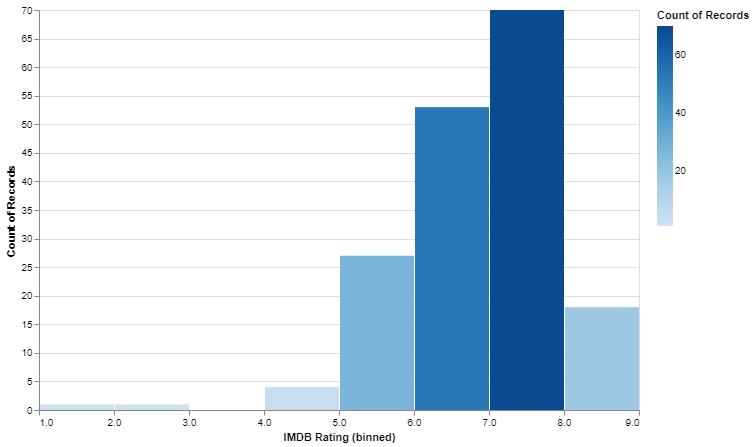

In [7]:
'''IMDB ratings'''
alt.Chart(movies_data, height = 400, width = 600) \
    .mark_bar() \
    .encode(alt.X('IMDB Rating', bin = True),
           y = 'count()',
           color = 'count()')

<h3> Most of the movies we have in the dataframe tends to have a rating from 6 - 8 & very few movies rated 1-2. </h3>

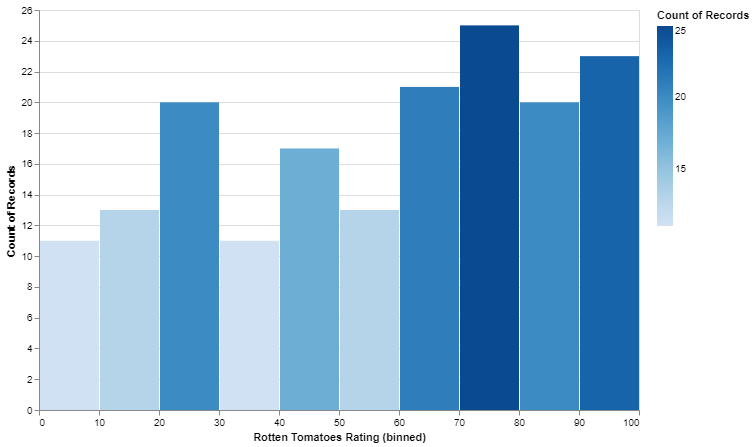

In [8]:
'''Rotten tomatoes rating'''
alt.Chart(movies_data, height = 400, width = 600) \
    .mark_bar() \
    .encode(alt.X('Rotten Tomatoes Rating', bin = True),
           y = 'count()',
           color = 'count()')

<h3>Many movies are rated poorly. Seems like people rating the movies on rotten tomatoes seems to be harsher </h3>

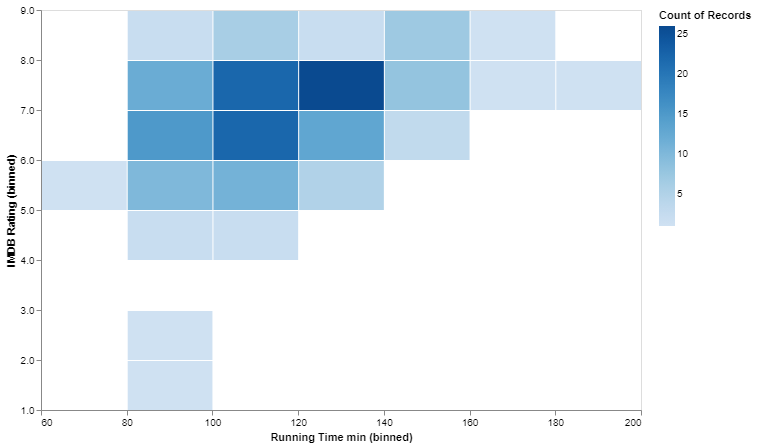

In [10]:
'''Running time and individual rating corresponds'''

alt.Chart(movies_data, height = 400, width = 600) \
    .mark_bar() \
    .encode(alt.X('Running Time min', bin=True),
           alt.Y('IMDB Rating', bin = True),
           color = 'count()')

<h3> Sets up a metric type representation. Most movies have running time between 120-140 min and have a high rating from 7-8.</h3>

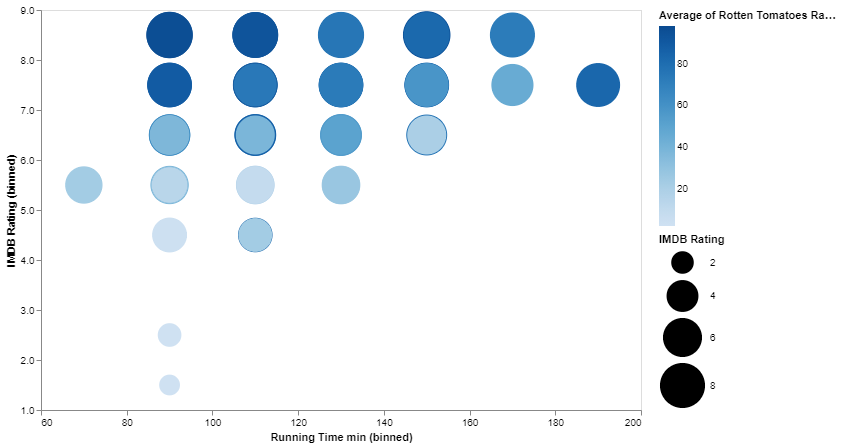

In [11]:
alt.Chart(movies_data, height = 400, width = 600) \
    .mark_circle() \
    .encode(alt.X('Running Time min', bin=True),
           alt.Y('IMDB Rating', bin = True),
            size = 'IMDB Rating',
           color = 'average(Rotten Tomatoes Rating)')

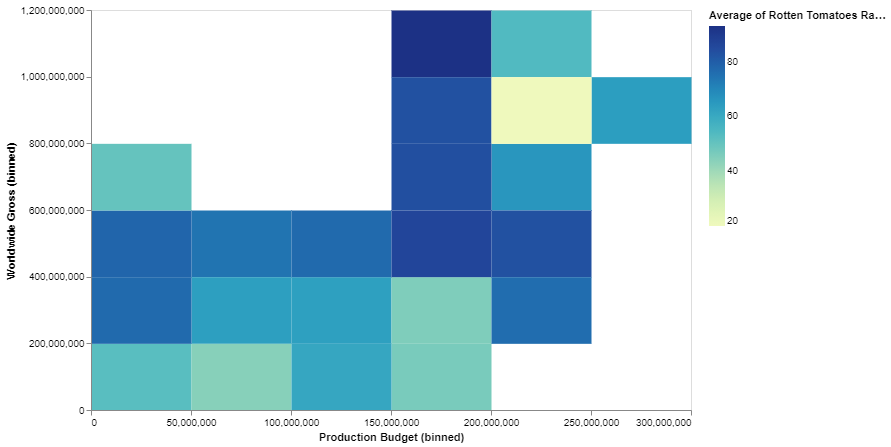

In [12]:
alt.Chart(movies_data, height = 400, width = 600) \
    .mark_rect() \
    .encode(alt.X('Production Budget', bin=True),
           alt.Y('Worldwide Gross', bin = True),
           color = 'average(Rotten Tomatoes Rating)')

In [ ]:
<h3> Some high budget movies greater than 200 m whihc are pretty low rated</h3